# Import Data

In [25]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/dataset-of-10s.csv")

df.drop(['uri'], axis=1).head()

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


In [26]:
df.shape

(6398, 19)

In [27]:
print(df.dtypes)
df2= df.drop(['track','uri','artist'], axis=1)

track                object
artist               object
uri                  object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
chorus_hit          float64
sections              int64
target                int64
dtype: object


In [28]:
df2.head() 

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


In [29]:
df['target'].unique().shape[0]

2

In [30]:
unique_value=df.select_dtypes(exclude=['object']).nunique().sort_values()
unique_value

mode                   2
target                 2
time_signature         5
key                   12
sections              40
danceability         882
energy              1066
speechiness         1114
liveness            1206
valence             1219
instrumentalness    2302
acousticness        2668
loudness            4704
tempo               5531
duration_ms         5591
chorus_hit          6241
dtype: int64

In [31]:
df.isnull().values.any()

False

In [32]:
columns = list(df2.columns)

-----

# Plots

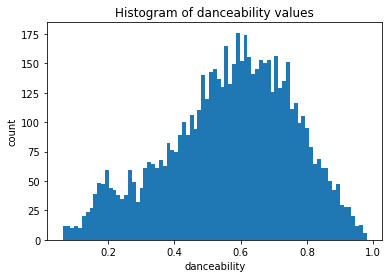

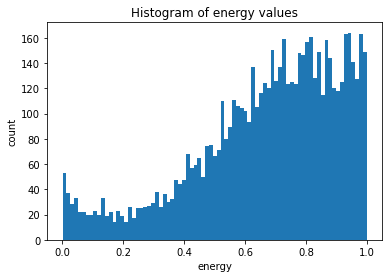

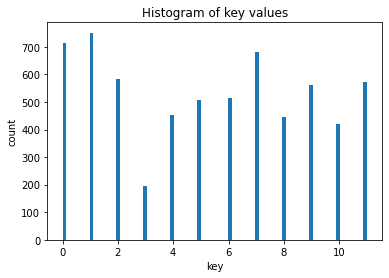

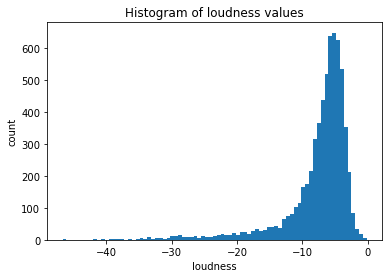

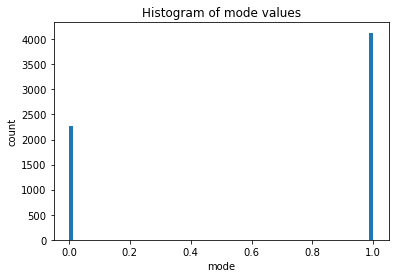

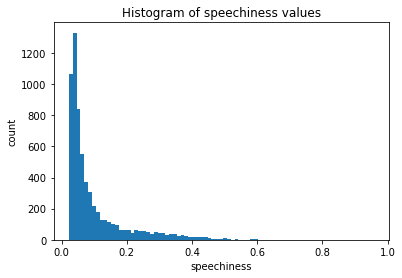

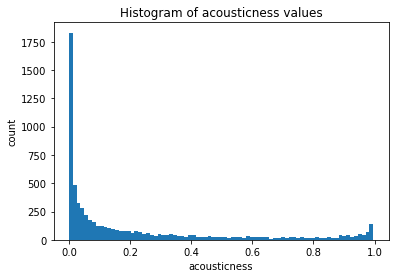

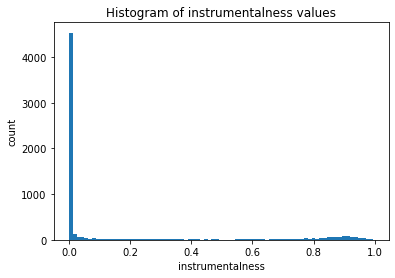

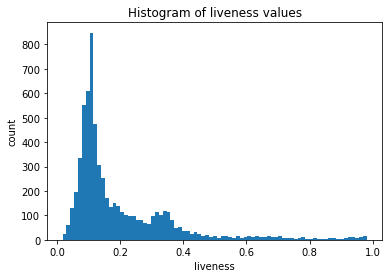

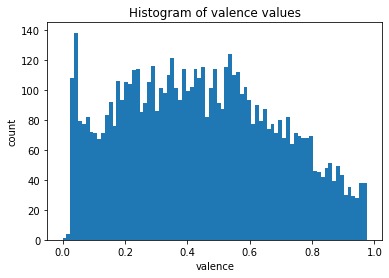

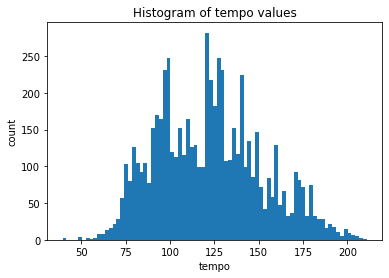

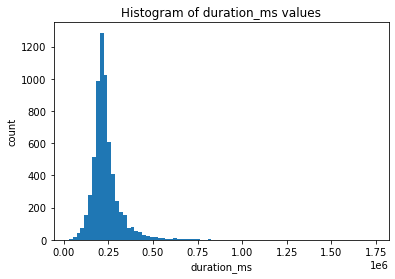

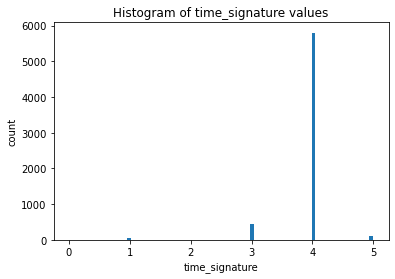

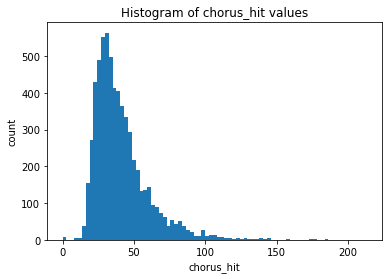

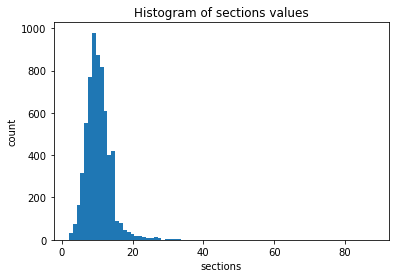

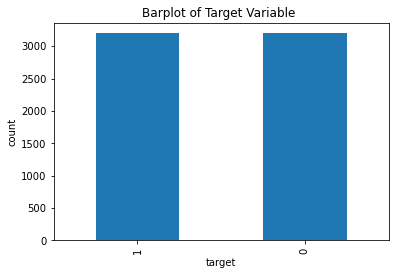

In [33]:
from matplotlib import pylab as plt
for column in columns:
    if column == "target":
        pd.value_counts(df[column]).plot.bar()
        figtitle = '../figures/barplot_target.png'
        plt.title('Barplot of Target Variable ')
        figtitle = f'../figures/barplot_{column}.png'
    else:
        df[column].plot.hist(bins = int(np.sqrt(df.shape[0])))
        plt.title(f'Histogram of {column} values')
        figtitle = f'../figures/histogram_{column}.png'
    plt.xlabel(column)
    plt.ylabel('count')
    
    plt.savefig(figtitle, dpi=300, format='png')
    plt.show()

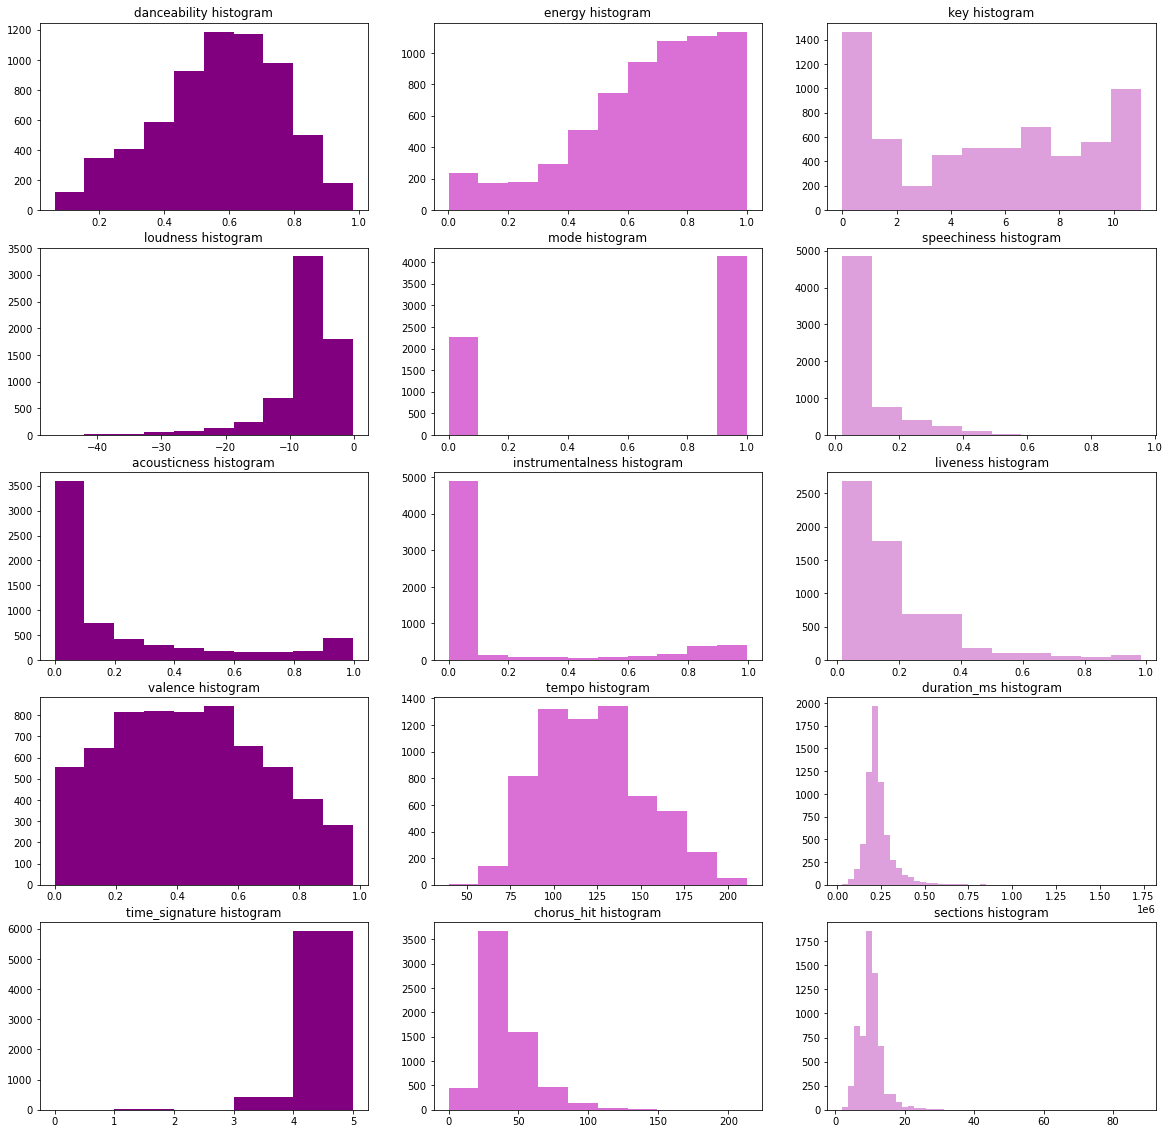

In [34]:
#create histograpms of all the variables to see distributions
fig, ax = plt.subplots(5,3, figsize=(20,20))

def hist_plot(row, column, variable, binsnum, color):
    ax[row, column].hist(df[variable], bins = binsnum, color = color)
    ax[row, column].set_title(variable + ' histogram')
    
hist_plot(0, 0, 'danceability', 10, 'purple')
hist_plot(0, 1, 'energy', 10, 'orchid')
hist_plot(0, 2, 'key', 10, 'plum')
hist_plot(1,0, 'loudness', 10, 'purple')
hist_plot(1,1, 'mode', 10, 'orchid')
hist_plot(1,2, 'speechiness', 10, 'plum')
hist_plot(2,0, 'acousticness', 10, 'purple')
hist_plot(2,1, 'instrumentalness', 10, 'orchid')
hist_plot(2,2, 'liveness', 10, 'plum')
hist_plot(3,0, 'valence', 10, 'purple')
hist_plot(3,1, 'tempo', 10, 'orchid')
hist_plot(3,2, 'duration_ms', 50, 'plum')
hist_plot(4,0, 'time_signature', 5, 'purple')
hist_plot(4,1, 'chorus_hit', 10, 'orchid')
hist_plot(4,2, 'sections', 50, 'plum')

figtitle = f'../figures/histogram_all.png'
plt.savefig(figtitle, dpi=300, format='png')
plt.show()


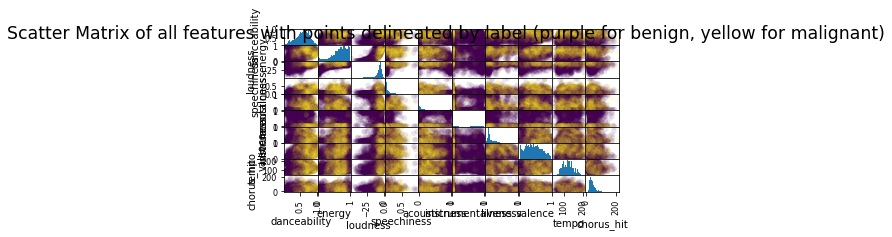

In [35]:
pd.plotting.scatter_matrix(df2.select_dtypes(float), figsize=(6, 3),c = pd.get_dummies(df['target']).iloc[:,1], 
                           marker='o',hist_kwds={'bins': 50}, s=30, alpha=.1)
plt.suptitle('Scatter Matrix of all features with points delineated by label (purple for benign, yellow for malignant)', 
            y = 0.90, fontsize='xx-large')
figtitle = f'../figures/scattermatrix_all_.png'
plt.savefig(figtitle, dpi=300, format='png')
plt.show()

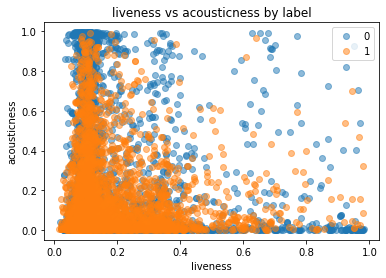

In [36]:
groups = df.groupby("target")
for name, group in groups:
    plt.plot(group['liveness'], group['acousticness'], marker="o", linestyle="", label=name,alpha=0.5)
plt.title("liveness vs acousticness by label")
plt.xlabel('liveness')
plt.ylabel('acousticness')
figtitle = f'../figures/scattermatrix_liveness_acouticness_.png'
plt.savefig(figtitle, dpi=300, format='png')
plt.legend()
plt.show()

1    3199
0    3199
Name: target, dtype: int64


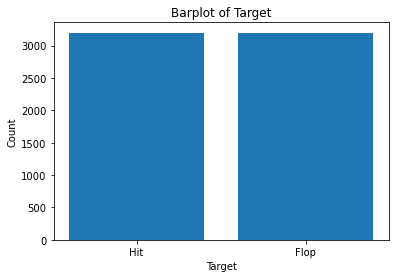

In [37]:
# Make a random dataset:
height = [df[df['target']==1].shape[0], df[df['target']==0].shape[0]]
bars = ('Hit', 'Flop')
y_pos = np.arange(len(bars))

print(df.target.value_counts())
# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

plt.title('Barplot of Target')
plt.ylabel('Count')
plt.xlabel('Target')

figtitle = f'../figures/scatterplot_target_.png'
plt.savefig(figtitle, dpi=300, format='png')
# Show graphic
plt.show()

In [38]:
df[df['target']==1].shape[0]

3199

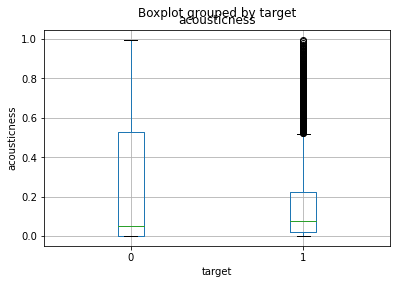

In [39]:
from matplotlib import pylab as plt
df[['target','acousticness']].boxplot(by='target')
plt.ylabel('acousticness')
plt.xlabel('target')

figtitle = f'../figures/boxplot_accousticness_target.png'
plt.savefig(figtitle, dpi=300, format='png')

plt.show()

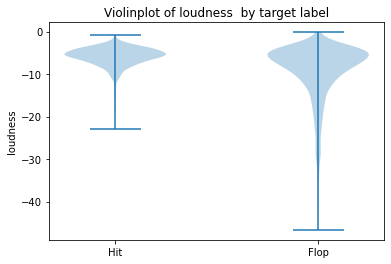

In [40]:
from matplotlib import pylab as plt
dataset = [df[df['target']==1]['loudness'].values,
           df[df['target']==0]['loudness'].values]

plt.violinplot(dataset = dataset)
plt.title('Violinplot of loudness  by target label')
plt.xticks([1,2],['Hit','Flop'])
plt.ylabel('loudness')
plt.show()

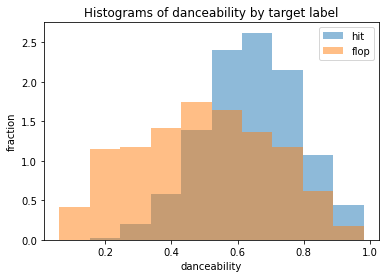

In [41]:
categories = df['target'].unique()
bin_range = (df['danceability'].min(),df['danceability'].max())
label=['flop','hit']
for c in categories:
    plt.hist(df[df['target']==c]['danceability'],alpha=0.5,label=label[c],range=bin_range,bins=10,density=True)
plt.legend()
plt.title('Histograms of danceability by target label')
plt.ylabel('fraction')
plt.xlabel('danceability')
plt.show()

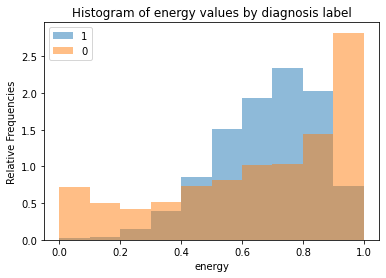

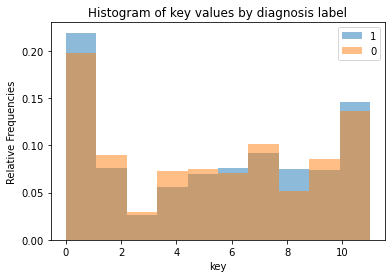

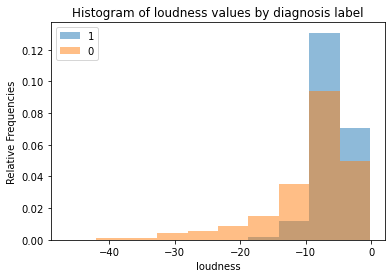

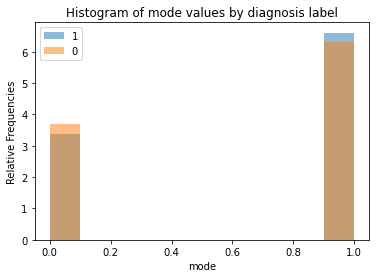

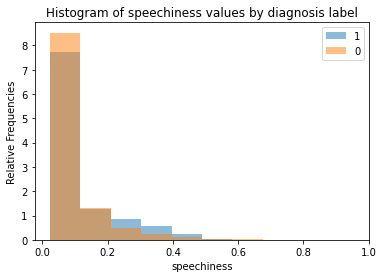

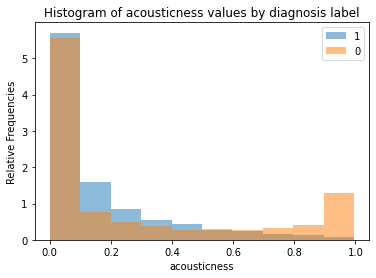

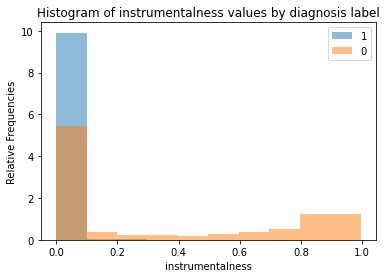

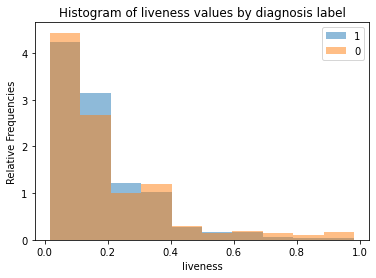

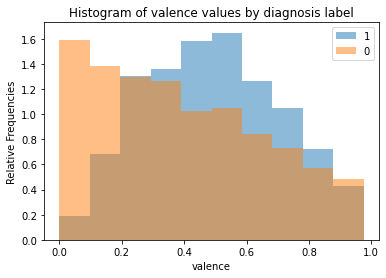

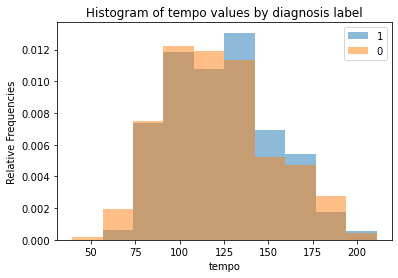

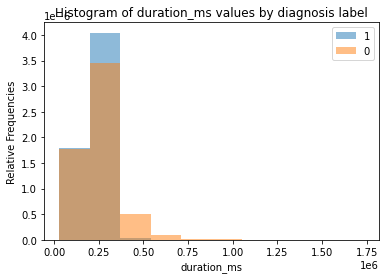

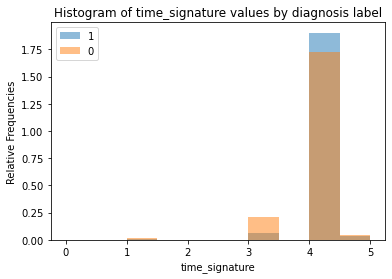

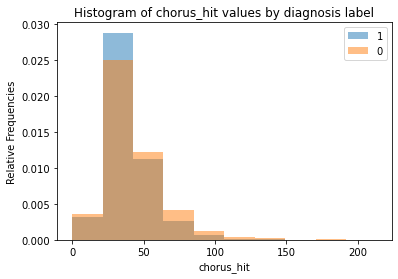

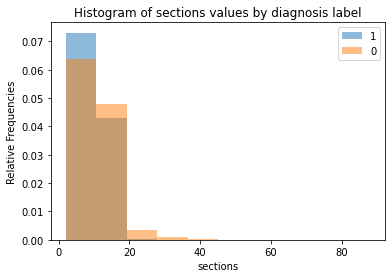

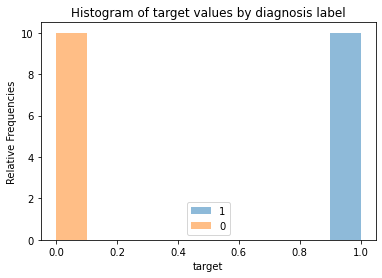

In [42]:
df2.columns[1:]

categories = df2['target'].unique()

for column in df2.columns[1:]:
    
    bin_range = (df2[column].min(),df2[column].max())

    for c in categories:
        plt.hist(df2[df2['target']==c][column],alpha=0.5,label=c,range=bin_range,bins=10,density=True)
    plt.legend()
    plt.ylabel('Relative Frequencies')
    plt.xlabel(column)
    plt.title(f'Histogram of {column} values by diagnosis label')
    
    figtitle = f'../figures/histogram_categories_{column}.png'
    plt.savefig(figtitle, dpi=300, format='png')
    plt.show()

-----

# Data Preprocessing

# Model Selection

In [43]:
#import packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold,GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder,MinMaxScaler
from sklearn.metrics import make_scorer,accuracy_score,classification_report

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.linear_model import Lasso, Ridge, ElasticNet,LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [59]:
y = df2['target']
X = df2.loc[:, df2.columns != 'target']
ftr_names = X.columns
#preprocess data
cat_ftrs  = ['key', 'mode','time_signature', 'sections']
cont_ftrs = ['danceability', 'energy',  'loudness', 'speechiness', 'acousticness', 
            'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
            'chorus_hit']
# ordinal encoder
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'))])
# standard scaler
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
            ('num', numeric_transformer, cont_ftrs),
            ('cat', categorical_transformer, cat_ftrs)])

In [45]:
def MLpipe_KFold_acc(X, y, preprocessor, ML_algo, param_grid):
    '''
    This function splits the data to other/test (80/20) and then applies KFold with 4 folds to other.
    The acc is minimized in cross-validation.
    '''
    
    test_scores = []
    best_models = []
    grids = []
    X_tests_cv = []
    y_tests_cv = []
    
    for i in range(10):
        #splits the data to other/test (80/20)
        X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state=42*i) 
        #applies KFold with 4 folds to other
        kf = KFold(n_splits=4,shuffle=True,random_state=42*i)
    
        
        pipe = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', ML_algo)])
        # use GridSearchCV
        # GridSearchCV loops through all parameter combinations and collects the results
        #use acc as score
        grid = GridSearchCV(pipe, param_grid=param_grid,scoring = make_scorer(accuracy_score, greater_is_better=True),
                            cv=kf, return_train_score = True, n_jobs=-1, verbose=False)

        # this line actually fits the model on other
        grid.fit(X_other, y_other)
        
        #best_param = grid.best_params_
        y_predict = grid.predict(X_test)
        
        test_score = accuracy_score(y_test,  y_predict)
        # append the test score and the best model 
        best_models.append(grid.best_estimator_)
        grids.append(grid)
        test_scores.append(test_score)
        X_tests_cv.append(X_test)
        y_tests_cv.append(y_test)
        #best_parameter.append(grid.best_params_)
        
    return grids, best_models, test_scores, X_tests_cv, y_tests_cv

## Logistic l1

In [70]:
param_grid_l1 = {'classifier__C': [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
              'classifier__max_iter': [100000]}

l1_grids, l1_models, l1_scores ,l1_X_tests ,l1_y_tests = MLpipe_KFold_acc(X,y,preprocessor,LogisticRegression(penalty='l1', solver='saga'),param_grid_l1)
print(max(l1_scores))

0.81640625


In [71]:
#l1_grids[0].score(l1_X_tests[0],l1_y_tests[0])

## Logistic l2

In [72]:
param_grid_l2 = {'classifier__C': [ 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
              'classifier__max_iter': [100000]}

l2_grids, l2_models, l2_scores ,_ ,_ = MLpipe_KFold_acc(X,y,preprocessor,LogisticRegression(penalty='l2', solver='saga'),param_grid_l2)
print(max(l2_scores))

0.8109375


## Logistic Elatic

In [73]:
param_grid = {'classifier__C': [ 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
                  'classifier__l1_ratio': [0.01, 0.25, 0.5, 0.75],
                  'classifier__max_iter': [100000]}

elastic_grids, elstic_models,elastic_scores,_ ,_ = MLpipe_KFold_acc(X,y,preprocessor,LogisticRegression(penalty='elasticnet', solver='saga'),param_grid)
print(max(elastic_scores))

0.815625


## Rando Forest

In [74]:
param_grid_RF ={'classifier__max_features': [1, 3, 5, 10, 12, None],
                  'classifier__max_depth': [1, 3, 5, 10, None]}

RF_grids, RF_models, RF_scores, X_tests_cv, y_tests_cv= MLpipe_KFold_acc(X,y,preprocessor,RandomForestClassifier(),param_grid_RF)
print(max(RF_scores))

0.85078125


## SVC

In [75]:
param_grid_SVC ={'classifier__gamma': [1e-2, 1e-1, 1e0, 1e1, 1e2, 'auto', 'scale'],
                  'classifier__C': np.logspace(-1, 1, 5)}

SVC_grids, SVC_models, SVC_scores ,_ ,_ = MLpipe_KFold_acc(X,y,preprocessor,SVC(),param_grid_SVC)
print(max(SVC_scores))

0.84140625


## KNN

In [76]:
param_grid_KNN ={'classifier__n_neighbors': [1, 5, 10, 30, 100], 
                  'classifier__weights': ['uniform', 'distance']}
KNN_grids, KNN_models, KNN_scores,_ ,_  = MLpipe_KFold_acc(X,y,preprocessor,KNeighborsClassifier(),param_grid_KNN)
print(max(KNN_scores))

0.80703125


## XGB

In [77]:
param_grid_XGB = {'classifier__max_depth': [1, 3, 5, 10, 30],
                  'classifier__eval_metric':['mlogloss']}
XGB_grids, XGB_models, XGB_scores,_ ,_  = MLpipe_KFold_acc(X,y,preprocessor,XGBClassifier(use_label_encoder=False),param_grid_XGB)
print(max(XGB_scores))

0.8484375


In [78]:
RF_models

[Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num',
                                                   Pipeline(steps=[('scaler',
                                                                    StandardScaler())]),
                                                   ['danceability', 'energy',
                                                    'loudness', 'speechiness',
                                                    'acousticness',
                                                    'instrumentalness',
                                                    'liveness', 'valence',
                                                    'tempo', 'duration_ms',
                                                    'chorus_hit']),
                                                  ('cat',
                                                   Pipeline(steps=[('onehot',
                                                                    OneHotEncoder(handle_

In [236]:
import pickle
file = open('../results/l1_models_tuned.save', 'wb')
pickle.dump(l1_models, file)
file.close()

file = open('../results/l2_models_tuned.save', 'wb')
pickle.dump(l2_models, file)
file.close()

file = open('../results/elastic_models_tuned.save', 'wb')
pickle.dump(elstic_models, file)
file.close()

file = open('../results/RF_models_tuned.save', 'wb')
pickle.dump(RF_models, file)
file.close()

file = open('../results/SVC_models_tuned.save', 'wb')
pickle.dump(SVC_models, file)
file.close()

file = open('../results/KNN_models_tuned.save', 'wb')
pickle.dump(KNN_models, file)
file.close()

file = open('../results/XGB_models_tuned.save', 'wb')
pickle.dump(XGB_models, file)
file.close()

In [237]:
file = open('../results/Best_model.save', 'wb')
pickle.dump(RF_grids[9], file)
file.close()

------

# Result

In [79]:
#repeat the split process and apply the best model
# to have a better understanding of its performance
def optimal_acc(X, y,preprocessor):
    X_tests = []
    y_tests = []
    y_predicts = []
    y_test_probs = []
    for i in range(10):
        #splits the data to other/test (80/20)
        X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state=42*i) 

        pipe = Pipeline(steps=[('preprocessor', preprocessor)])
        
        X_other = pipe.fit_transform(X_other)
        X_test = pipe.transform(X_test) 
        
        clf = RandomForestClassifier(max_features = None,max_depth = 5)
        clf.fit(X_other, y_other)
        y_predict =clf.predict(X_test)
        y_test_prob = clf.predict_proba(X_test)
        
        X_tests.append(X_test)
        y_tests.append(y_test)
        y_predicts.append(y_predict)
        y_test_probs.append(y_test_prob)
    return X_tests, y_tests ,y_test_probs, y_predicts

In [80]:
X_tests, y_tests,y_test_probs, y_predicts = optimal_acc(X, y,preprocessor)

In [240]:
file = open('../results/prediction.save', 'wb')
pickle.dump((X_tests, y_tests,y_test_probs, y_predicts),file)
file.close()

In [81]:
baseline_scores = [len([y for y in Y if y ==0])/len(Y) for Y in y_tests]
baseline_scores

[0.48046875,
 0.51171875,
 0.5125,
 0.50390625,
 0.5046875,
 0.51328125,
 0.5046875,
 0.5046875,
 0.48984375,
 0.48828125]

## Comparison Models

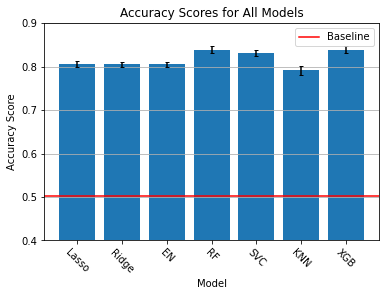

In [82]:
from statistics import mean, stdev

labels = [ "Lasso", "Ridge", "EN", "RF", "SVC", "KNN", "XGB"]
scores = [ l1_scores, l2_scores, elastic_scores, RF_scores, SVC_scores, KNN_scores, XGB_scores]
mean_scores = [mean(score) for score in scores]
stdev_scores = [stdev(score) for score in scores]

plt.bar(labels, mean_scores, yerr=stdev_scores, capsize=2)
plt.axhline(mean(baseline_scores),label='Baseline',color="red")
plt.ylim([0.4,0.9])
plt.xticks(rotation=-45)
plt.grid(axis='y')
plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.legend()
plt.title("Accuracy Scores for All Models")
plt.savefig('../figures/acc_bar_plot.png', dpi=300, format='png')
plt.show()

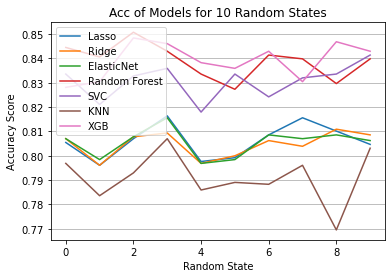

In [83]:
import matplotlib.pyplot as plt

plt.plot(l1_scores, label="Lasso")
plt.plot(l2_scores, label="Ridge")
plt.plot(elastic_scores, label="ElasticNet")
plt.plot(RF_scores, label="Random Forest")
plt.plot(SVC_scores, label="SVC")
plt.plot(KNN_scores, label="KNN")
plt.plot(XGB_scores, label="XGB")
plt.grid(axis='y')
plt.xlabel("Random State")
plt.ylabel("Accuracy Score")
plt.title("Acc of Models for 10 Random States")
plt.legend()
plt.savefig('../figures/acc_chart_plot.png', dpi=300, format='png')
plt.show()

In [84]:
print(mean(RF_scores),stdev(RF_scores))
print(mean(baseline_scores), stdev(baseline_scores))

0.8390625 0.007045702738785766
0.5014062499999999 0.011320189989080956


## ROC curve

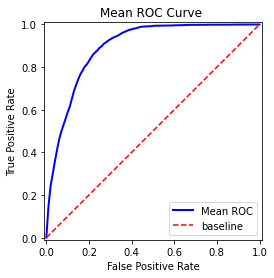

In [85]:
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
import numpy as np

tprs = []
aucs = []
base_fpr = np.linspace(0, 1, 101)

for y_test, y_test_prob in zip(y_tests, y_test_probs):
    
    fpr, tpr, _ = roc_curve(y_test, y_test_prob[:, 1])
    

    tpr = np.interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    tprs.append(tpr)
    
tprs = np.array(tprs)
mean_tprs = tprs.mean(axis=0)
std = tprs.std(axis=0)

tprs_upper = np.minimum(mean_tprs + std, 1)
tprs_lower = np.maximum(mean_tprs - std, 0)

plt.plot(base_fpr, mean_tprs, 'b', label="Mean ROC", lw=2)
plt.plot([0, 1], [0, 1],'r--',label='baseline')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.title("Mean ROC Curve ")
plt.savefig('../figures/ROC_curves.png', dpi=300, format='png')
plt.show()

## Confusion Matrix

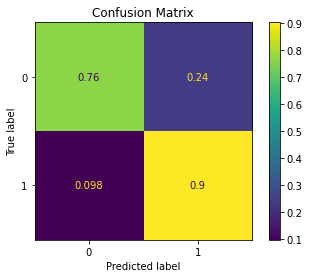

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cms = [confusion_matrix(y_tests[0], y_predicts[0]) for i in range(len(y_tests))]

tn = sum([a[0,0] for a in cms]) / len([a[0,0] for a in cms])
fp = sum([a[0,1] for a in cms]) / len([a[0,1] for a in cms])
fn = sum([a[1,0] for a in cms]) / len([a[1,0] for a in cms])
tp = sum([a[1,1] for a in cms]) / len([a[1,1] for a in cms])

mean_confusion_matrix = np.array([[tn, fp], [fn, tp]])
cm = mean_confusion_matrix.astype('float') / mean_confusion_matrix.sum(axis=1)[:, np.newaxis]
cm

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
#plt.set_xticklabels('flop','hit')
#plt.set_yticklabels('flop','hit')
plt.savefig('../figures/confusion_matrixs.png', dpi=300, format='png')
plt.show()

## Global Importance

In [214]:
nr_runs = 10
np.random.seed(42)
scores = np.zeros([len(feature_names),nr_runs])
grid = RF_grids[9]#the best model

X_test = X_tests_cv[9]
y_test = y_tests_cv[9]

X_test_transformed = grid.best_estimator_[0].transform(X_test)

test_score = grid.score(X_test,y_test)
print('test score = ',test_score)
print('test baseline = ',np.sum(y_test == 0)/len(y_test))
# loop through the features
for i in range(len(feature_names)):
    print('shuffling '+str(feature_names[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[feature_names[i]] = np.random.permutation(X_test_transformed[:,i])
        acc_scores.append(grid.score(X_test_shuffled,y_test))
    print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

test score =  0.83984375
test baseline =  0.48828125
shuffling danceability
   shuffled test score: 0.71 +/- 0.006
shuffling energy
   shuffled test score: 0.783 +/- 0.009
shuffling loudness
   shuffled test score: 0.841 +/- 0.001
shuffling speechiness
   shuffled test score: 0.844 +/- 0.004
shuffling acousticness
   shuffled test score: 0.757 +/- 0.005
shuffling instrumentalness
   shuffled test score: 0.716 +/- 0.009
shuffling liveness
   shuffled test score: 0.837 +/- 0.002
shuffling valence
   shuffled test score: 0.812 +/- 0.005
shuffling tempo
   shuffled test score: 0.838 +/- 0.0
shuffling duration_ms
   shuffled test score: 0.791 +/- 0.0
shuffling chorus_hit
   shuffled test score: 0.834 +/- 0.0
shuffling key_0
   shuffled test score: 0.84 +/- 0.0
shuffling key_1
   shuffled test score: 0.84 +/- 0.0
shuffling key_2
   shuffled test score: 0.84 +/- 0.0
shuffling key_3
   shuffled test score: 0.84 +/- 0.0
shuffling key_4
   shuffled test score: 0.84 +/- 0.0
shuffling key_5
   shu

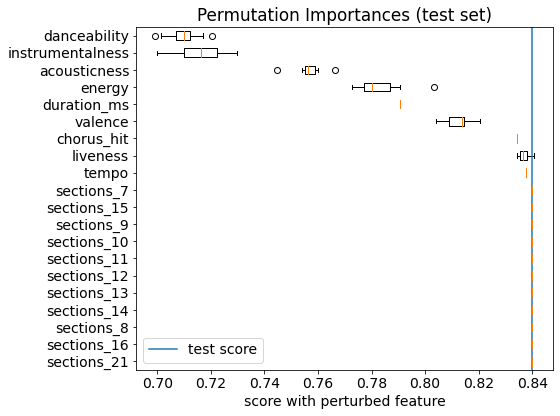

In [223]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]
sorted_indcs = sorted_indcs[-20:]
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
plt.boxplot(scores[sorted_indcs].T,labels=feature_names[sorted_indcs],vert=False)
plt.axvline(test_score,label='test score')
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
plt.savefig('../figures/global_importance.png', dpi=300, format='png')
plt.show()

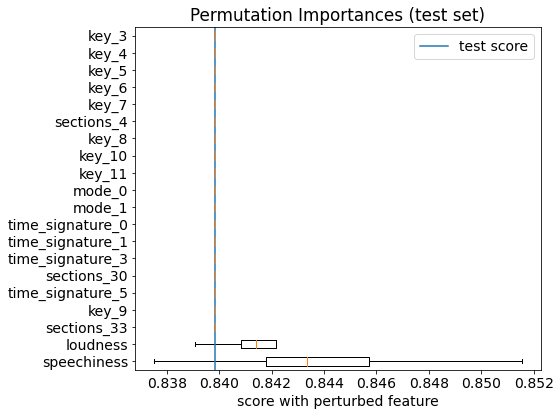

In [229]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]
sorted_indcs = sorted_indcs[:20]
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
plt.boxplot(scores[sorted_indcs].T,labels=feature_names[sorted_indcs],vert=False)
plt.axvline(test_score,label='test score')
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
plt.savefig('../figures/global_importance_least.png', dpi=300, format='png')
plt.show()

## SHAP

In [105]:
import shap
shap.initjs() # required for visualizations later on
# create the explainer object with the random forest model
grid = RF_grids[9]
X_test = X_tests_cv[9]
y_test = y_tests_cv[9]

# create the explainer object with the random forest model
explainer = shap.TreeExplainer(grid.best_estimator_[1])
# transform the test set
X_test_transformed = grid.best_estimator_[0].transform(X_test)
print(np.shape(X_test_transformed))
# calculate shap values on all points in the test
shap_values = explainer.shap_values(X_test_transformed)
print(np.shape(shap_values))

(1280, 69)
(2, 1280, 69)


In [197]:
feature_names = cont_ftrs + \
                list(grid.best_estimator_[0].named_transformers_['cat'][0].get_feature_names_out(cat_ftrs))

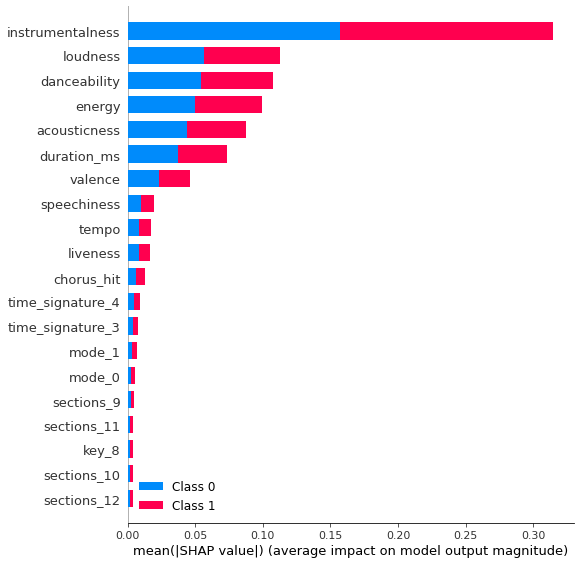

In [106]:
shap.summary_plot(shap_values, X_test_transformed,feature_names = feature_names)

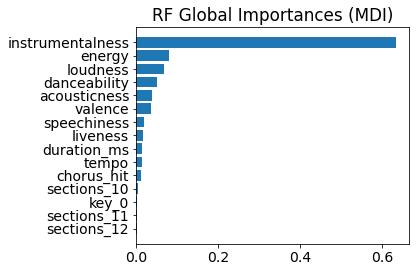

In [227]:
# collect all the encoders

rf = Pipeline(
    [
       ('preprocess', preprocessor),
       ('classifier', RandomForestClassifier(max_features = None ,max_depth = 5,random_state=42))
    ]
)
rf.fit(X_test, y_test)

ohe = rf.named_steps["preprocess"].named_transformers_["cat"]
feature_names = ohe.get_feature_names_out(cat_ftrs)
feature_names = np.r_[cont_ftrs, feature_names]

tree_feature_importances = rf.named_steps["classifier"].feature_importances_
sorted_idx = tree_feature_importances.argsort()

y_ticks = np.arange(15)
fig, ax = plt.subplots()
ax.barh(y_ticks, tree_feature_importances[sorted_idx][-15:])
ax.set_yticks(y_ticks)
ax.set_yticklabels(feature_names[sorted_idx][-15:])
ax.set_title("RF Global Importances (MDI)")
fig.tight_layout()
plt.savefig('../figures/MDI_importance.png', dpi=300, format='png')
plt.show()

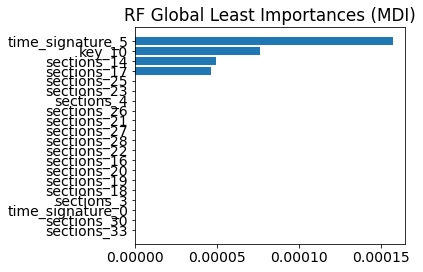

In [232]:
y_ticks = np.arange(20)
fig, ax = plt.subplots()
ax.barh(y_ticks, tree_feature_importances[sorted_idx][:20])
ax.set_yticks(y_ticks)
ax.set_yticklabels(feature_names[sorted_idx][:20])
ax.set_title("RF Global Least Importances (MDI)")
fig.tight_layout()
plt.savefig('../figures/MDI_importance_least.png', dpi=300, format='png')
plt.show()

-----

## Local Importance

In [207]:
import shap
shap.initjs() # required for visualizations later on
# create the explainer object with the random forest model
grid = RF_grids[9]
X_test = X_tests_cv[9]
y_test = y_tests_cv[9]

# create the explainer object with the random forest model
explainer = shap.TreeExplainer(grid.best_estimator_[1])
# transform the test set
X_test_transformed = grid.best_estimator_[0].transform(X_test)
print(np.shape(X_test_transformed))
# calculate shap values on the first 1000 points in the test
shap_values1 = explainer.shap_values(X_test_transformed[:1000])
print(np.shape(shap_values1))

(1280, 69)
(2, 1000, 69)


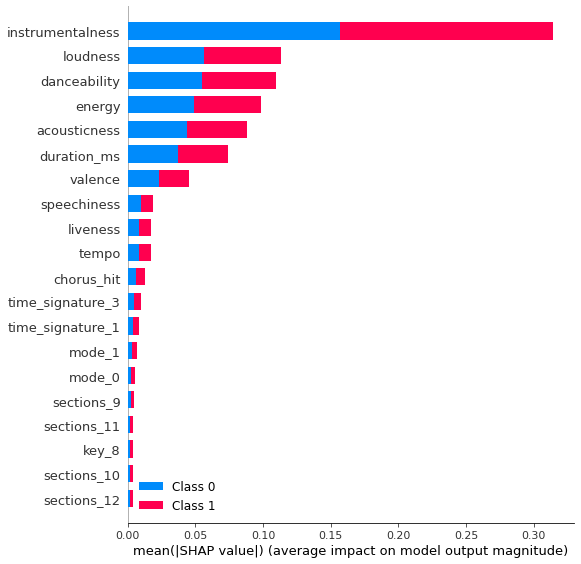

<Figure size 432x288 with 0 Axes>

In [208]:
shap.summary_plot(shap_values1,X_test_transformed[:1000], feature_names = feature_names, 
                  title="SHAP Summary Plot for Second Random State")
plt.savefig('../figures/shap_values1.png', dpi=300, format='png')

In [225]:
index = 250
shap.force_plot(explainer.expected_value[0], shap_values1[0][index,:], features = X_test_transformed[index,:],feature_names = feature_names)
